Q1. Explain the concept of batch normalization in the context of Artificial Neural Networksr.

Batch Normalization (BN) is a technique used in the training of artificial neural networks to address issues related to internal covariate shift. Internal covariate shift refers to the change in the distribution of the inputs to a layer during training, which can make the training process more challenging.

In a neural network, each layer receives inputs from the previous layer, and these inputs can vary in scale and distribution as the network learns. This can lead to slower convergence and make it difficult to choose an appropriate learning rate. Batch Normalization aims to mitigate these issues by normalizing the inputs to a layer.

Here's a high-level overview of how Batch Normalization works:

1. Normalization: In each mini-batch during training, Batch Normalization normalizes the inputs by subtracting the batch mean and dividing by the batch standard deviation. This helps to center and normalize the inputs, reducing internal covariate shift.

2. Scaling and Shifting: After normalization, the normalized inputs are scaled and shifted using learnable parameters (gamma and beta). This allows the model to learn the optimal scale and shift for each feature, providing some flexibility to the normalization process.

The normalized and transformed inputs are given by the following formula:

BN(xi)=γ( xi−μ/σ)+β

where:

xi is the input to the layer.
μ is the mean of the mini-batch.
σ is the standard deviation of the mini-batch.
γ is a learnable scaling parameter.
β is a learnable shifting parameter.

1. Training and Inference Phases: During training, Batch Normalization uses the mean and standard deviation of the current mini-batch. However, during inference, it uses the moving averages of the mean and standard deviation computed during training. This ensures that the model can generalize well to unseen data.
Batch Normalization provides several benefits, including:


a. Faster Convergence: Normalizing inputs helps in maintaining a stable distribution of inputs throughout training, which can lead to faster convergence.

b. Reduced Sensitivity to Initialization: BN reduces the sensitivity of the network to the choice of initial weights.

c. Regularization Effect: Batch Normalization acts as a form of regularization, reducing the need for other regularization techniques like dropout in some cases.


Q2. Describe the benefits of using batch normalization during training.

Batch Normalization (BN) provides several benefits during the training of neural networks:

1. Stability and Faster Convergence: One of the primary benefits of Batch Normalization is that it helps stabilize and accelerate the training process. By normalizing the inputs to each layer, BN mitigates the internal covariate shift problem, where the distribution of inputs to a layer changes during training. This stability often leads to faster convergence, allowing the neural network to reach a good solution more quickly.

2. Reduced Sensitivity to Initialization: BN reduces the dependence of the network on the initial weights. Neural networks can be sensitive to the choice of initial weights, and Batch Normalization helps mitigate this issue by normalizing inputs, making the training less dependent on the initial weight values.

3. Higher Learning Rates: Batch Normalization enables the use of higher learning rates during training. The normalization of inputs helps prevent large updates in the weights, allowing for more aggressive learning rates without the risk of diverging or oscillating during training.

4. Mitigation of Vanishing and Exploding Gradients: BN helps alleviate the vanishing and exploding gradient problems. By normalizing the inputs, it keeps the gradients within a reasonable range, making it easier to train deep networks without the issues associated with extremely small or large gradients.

5. Regularization Effect: Batch Normalization has a slight regularizing effect, reducing the need for other regularization techniques such as dropout in some cases. The normalization process introduces some noise to the training process, acting as a form of implicit regularization that can prevent overfitting.

6. Improved Generalization: The normalization process performed by BN at each mini-batch helps the model generalize better to unseen data. It can reduce the impact of variations in input distribution, making the network more robust and better able to handle different datasets.

7. Facilitates Training of Deeper Networks: Batch Normalization is particularly beneficial when training deep neural networks. As the depth of the network increases, the internal covariate shift problem becomes more pronounced, and BN helps mitigate this issue, making it easier to train deep architectures.

8. Compatibility with Different Activation Functions: Batch Normalization is compatible with various activation functions, allowing for flexibility in choosing the non-linearities in different parts of the network.

Q3. Discuss the working principle of batch normalization, including the normalization step and the learnable
parameters.

Batch Normalization (BN) works by normalizing the inputs of a neural network layer during training, which helps address the internal covariate shift problem. The internal covariate shift refers to the change in the distribution of inputs to a layer as the network trains, which can slow down the learning process. Batch Normalization introduces normalization and learnable parameters to tackle this issue.

The working principle of Batch Normalization involves the following steps:

Normalization Step:

For a given mini-batch during training, the normalization step involves subtracting the mean and dividing by the standard deviation. Given an input 
xi from the mini-batch, the normalized output yi is calculated as follows:

Yi=xi-μ/σ

where:
xi is the input.
μ is the mean of the mini-batch.
σ is the standard deviation of the mini-batch.

2. Scaling and Shifting:

After normalization, the normalized inputs are scaled and shifted using learnable parameters. This is to reintroduce the ability of the model to choose its own scale and shift for each feature. The scaled and shifted outputs (zi)are obtained using the following formula:
zi=γi+β
 
 where:

γ is a learnable scaling parameter.
β is a learnable shifting parameter.

3. Training and Inference Phases:

During training, the mean and standard deviation used for normalization are calculated based on the current mini-batch. This introduces a slight noise to the training process, which acts as a regularizing effect.

During inference, the mean and standard deviation used for normalization are typically replaced with moving averages computed during training. This ensures that the model generalizes well to unseen data by using statistics accumulated over the entire training process.



ImpementatiTn:- 

Q2. Choose a dataset of  MNIST and preprocess itr

In [1]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 54.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 72.1 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 77.9 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 41.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 64.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 72.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 78.4 MB/s eta 0:00:

2024-02-01 07:20:50.243439: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-01 07:20:50.308595: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-01 07:20:50.308670: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-01 07:20:50.310183: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-01 07:20:50.319201: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-01 07:20:50.319989: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [4]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [6]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [7]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [8]:
print("Number of training examples:", x_train.shape[0])
print("Number of testing examples:", x_test.shape[0])
print("Shape of each image:", x_train[0].shape)
print("Number of classes:", y_train.shape[1])

Number of training examples: 60000
Number of testing examples: 10000
Shape of each image: (28, 28, 1)
Number of classes: 10


Q2. Implement a simple feedforward neural network using deep learning framework/library Tensorlow. 

In [7]:
!pip install tensorflow
!pip install keras
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2024-02-01 07:34:23.097715: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-01 07:34:23.162154: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-01 07:34:23.162223: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-01 07:34:23.163727: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-01 07:34:23.172744: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-01 07:34:23.173405: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [18]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [19]:
mnist= tf.keras.datasets.mnist

In [20]:
model = models.Sequential
([ layers.Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    layers.Conv2D(16, (5, 5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [28]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1663 - accuracy: 0.9625
Test accuracy: 0.9624999761581421


In [15]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [23]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [52]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  
])

In [25]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.5472 - accuracy: 0.8556 - val_loss: 0.3511 - val_accuracy: 0.9111
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2929 - accuracy: 0.9232 - val_loss: 0.2644 - val_accuracy: 0.9287
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2114 - accuracy: 0.9420 - val_loss: 0.1957 - val_accuracy: 0.9492
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1662 - accuracy: 0.9525 - val_loss: 0.1919 - val_accuracy: 0.9413
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1388 - accuracy: 0.9610 - val_loss: 0.1703 - val_accuracy: 0.9573
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1294 - accuracy: 0.9638 - val_loss: 0.1644 - val_accuracy: 0.9598
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1177 - accuracy: 0.9679 - val_loss: 0.1536 - val_accuracy:

In [27]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)

313/313 [==============================] - 0s 2ms/step - loss: 0.1663 - accuracy: 0.9625
Test Accuracy: 0.9624999761581421


In [ ]:
Q4.  Implement batch normalization layers in the neural network and train the model againr

In [30]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [51]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  
    layers.Dense(128),
    layers.BatchNormalization(),  
    layers.ReLU(),  
    layers.Dense(64),
    layers.BatchNormalization(), 
    layers.ReLU(),  
    layers.Dense(10, activation='softmax')  
])

In [32]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 139.4737 - accuracy: 0.1242
Test Accuracy: 0.1242000013589859


Q5. Compare the training and validation performance (e.g., accuracy, loss) between the models with and 
without batch normalization.

In [50]:
def build_model_without_bn():
    model = models.Sequential([
        layers.Flatten(input_shape=(28, 28)),  
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')  
    ])
    return model

In [49]:
def build_model_with_bn():
    model = models.Sequential([
        layers.Flatten(input_shape=(28, 28)),  
        layers.Dense(128),
        layers.BatchNormalization(),  
        layers.ReLU(),  
        layers.Dense(64),
        layers.BatchNormalization(),  
        layers.ReLU(),  
        layers.Dense(10, activation='softmax')  
    ])
    return model


In [36]:
model_without_bn = build_model_without_bn()
model_without_bn.compile(optimizer='adam',
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])

model_with_bn = build_model_with_bn()
model_with_bn.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])


In [37]:
history_without_bn = model_without_bn.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))
history_with_bn = model_with_bn.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.8993 - accuracy: 0.8617 - val_loss: 0.4744 - val_accuracy: 0.9035
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3346 - accuracy: 0.9235 - val_loss: 0.2732 - val_accuracy: 0.9367
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2181 - accuracy: 0.9429 - val_loss: 0.2269 - val_accuracy: 0.9465
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1636 - accuracy: 0.9545 - val_loss: 0.1771 - val_accuracy: 0.9551
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1433 - accuracy: 0.9585 - val_loss: 0.1365 - val_accuracy: 0.9624
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1181 - accuracy: 0.9664 - val_loss: 0.1348 - val_accuracy: 0.9656
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1084 - accuracy: 0.9686 - val_loss: 0.1402 - val_accuracy:

In [38]:
test_loss_without_bn, test_acc_without_bn = model_without_bn.evaluate(x_test, y_test)
print("Model without Batch Normalization - Test Accuracy:", test_acc_without_bn)


313/313 [==============================] - 0s 1ms/step - loss: 0.1520 - accuracy: 0.9664
Model without Batch Normalization - Test Accuracy: 0.9664000272750854


In [39]:
test_loss_with_bn, test_acc_with_bn = model_with_bn.evaluate(x_test, y_test)
print("Model with Batch Normalization - Test Accuracy:", test_acc_with_bn)


313/313 [==============================] - 1s 2ms/step - loss: 0.0713 - accuracy: 0.9783
Model with Batch Normalization - Test Accuracy: 0.9782999753952026


In [40]:
import matplotlib.pyplot as plt


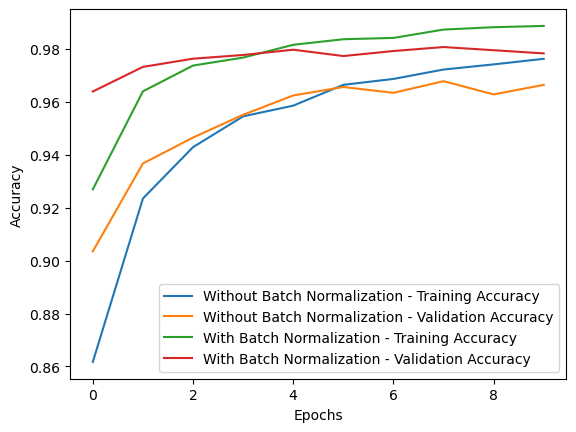

In [41]:
plt.plot(history_without_bn.history['accuracy'], label='Without Batch Normalization - Training Accuracy')
plt.plot(history_without_bn.history['val_accuracy'], label='Without Batch Normalization - Validation Accuracy')
plt.plot(history_with_bn.history['accuracy'], label='With Batch Normalization - Training Accuracy')
plt.plot(history_with_bn.history['val_accuracy'], label='With Batch Normalization - Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

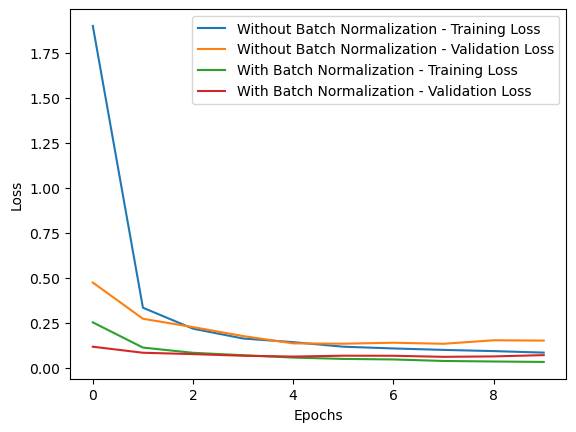

In [42]:
plt.plot(history_without_bn.history['loss'], label='Without Batch Normalization - Training Loss')
plt.plot(history_without_bn.history['val_loss'], label='Without Batch Normalization - Validation Loss')
plt.plot(history_with_bn.history['loss'], label='With Batch Normalization - Training Loss')
plt.plot(history_with_bn.history['val_loss'], label='With Batch Normalization - Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
                                                        3. ExperimentatiTn and Înalysis

Q1. Experiment with different batch sizes and observe the effect on the training dynamics and model 
performance. 

In [43]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [48]:
def build_model():
    model = models.Sequential([
        layers.Flatten(input_shape=(28, 28)),  
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')  
    ])
    return model

In [45]:
model = build_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [46]:
batch_sizes = [16, 32, 64, 128]
histories = []

for batch_size in batch_sizes:
    print(f"Training with batch size: {batch_size}")
    history = model.fit(x_train, y_train, epochs=10, batch_size=batch_size, validation_data=(x_test, y_test))
    histories.append(history)


Training with batch size: 16
Epoch 1/10
3750/3750 [==============================] - 12s 3ms/step - loss: 1.1718 - accuracy: 0.8470 - val_loss: 0.3223 - val_accuracy: 0.9167
Epoch 2/10
3750/3750 [==============================] - 11s 3ms/step - loss: 0.2762 - accuracy: 0.9278 - val_loss: 0.3245 - val_accuracy: 0.9253
Epoch 3/10
3750/3750 [==============================] - 11s 3ms/step - loss: 0.2044 - accuracy: 0.9472 - val_loss: 0.1813 - val_accuracy: 0.9522
Epoch 4/10
3750/3750 [==============================] - 11s 3ms/step - loss: 0.1703 - accuracy: 0.9564 - val_loss: 0.1828 - val_accuracy: 0.9581
Epoch 5/10
3750/3750 [==============================] - 11s 3ms/step - loss: 0.1450 - accuracy: 0.9637 - val_loss: 0.1832 - val_accuracy: 0.9563
Epoch 6/10
3750/3750 [==============================] - 11s 3ms/step - loss: 0.1321 - accuracy: 0.9671 - val_loss: 0.1556 - val_accuracy: 0.9617
Epoch 7/10
3750/3750 [==============================] - 11s 3ms/step - loss: 0.1263 - accuracy: 0.969

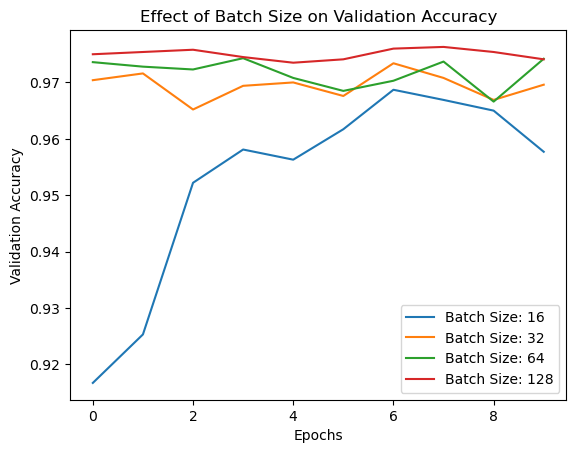

In [47]:
import matplotlib.pyplot as plt

for i, history in enumerate(histories):
    plt.plot(history.history['val_accuracy'], label=f'Batch Size: {batch_sizes[i]}')

plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Effect of Batch Size on Validation Accuracy')
plt.legend()
plt.show()

Q2. Discuss the advantages and potential limitations of batch normalization in improving the training of 
neural networks. 

Batch normalization (BN) is a technique commonly used in training deep neural networks that aims to improve convergence speed, training stability, and generalization performance. Here are some advantages and potential limitations of batch normalization:

Advantages:

1. Improved Convergence Speed: Batch normalization helps in faster convergence during training by reducing internal covariate shift. This allows the model to converge faster, meaning fewer epochs are required to achieve a certain level of performance.

2. Stabilizes Training: BN normalizes the inputs to each layer across mini-batches, which reduces the likelihood of vanishing or exploding gradients. This stabilization effect allows for deeper networks to be trained more effectively.

3. Regularization Effect: Batch normalization adds some noise to each layer during training due to the normalization process. This acts as a form of regularization, which can reduce overfitting and improve the model's generalization performance.

4. Allows for Higher Learning Rates: With batch normalization, it's often possible to use higher learning rates during training without causing the optimization process to diverge. This can further accelerate the training process.

5. Makes Network Less Sensitive to Weight Initialization: BN reduces the sensitivity of the model to the initial values of weights, allowing for more flexibility in weight initialization methods.

6. Removes the Need for Excessive Dropout: Batch normalization can mitigate the need for excessive dropout, as it already introduces some form of regularization by adding noise to the network during training.


Limitations:

1. Batch Size Dependency: Batch normalization computes statistics (mean and variance) over each mini-batch during training. As a result, batch normalization can be sensitive to the choice of batch size. Very small batch sizes may lead to inaccurate estimates of statistics, while very large batch sizes may diminish the regularization effect.

2. Not Suitable for Very Small Datasets: In cases where the dataset is very small, batch normalization may not perform optimally, as the statistics computed from small mini-batches may not accurately represent the entire dataset.

3. Not Suitable for Recurrent Networks: In recurrent neural networks (RNNs) and its variants like LSTMs and GRUs, batch normalization may not perform well due to the temporal nature of the data. Alternative normalization techniques like layer normalization or instance normalization are preferred in such cases.

4. Test-Time Statistics: During inference, the statistics (mean and variance) computed during training might not be representative of the test data. Techniques like running average of batch statistics or batch renormalization are used to address this issue.

5. Computational Overhead: Batch normalization adds additional computations during training, as it requires computing mean and variance for each mini-batch. While this overhead is generally negligible, it can become significant for models with very large batch sizes or in resource-constrained environments.
